Imports


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [2]:
data_path = "../udataset/population_by_state.csv"
df = pd.read_csv(data_path)
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,state,year,population
0,alabama,1900,1830000
1,alabama,1901,1907000
2,alabama,1902,1935000
3,alabama,1903,1957000
4,alabama,1904,1978000
...,...,...,...
6219,wyoming,2019,580116
6220,wyoming,2020,577664
6221,wyoming,2021,579548
6222,wyoming,2022,581629


In [3]:
# Drop the state column
state = df['state']
features = df.drop(['state'], axis=1)

start_year = 2010
end_year = 2022

Predict clusters

In [4]:
df['cluster'] = pd.NA
num_clusters = 4
init = None
for year in range(start_year, end_year + 1):
    if init is None:
        kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    else:
        kmeans = KMeans(n_clusters=num_clusters, init=init, random_state=0)

    year_features = features[features['year'] == year].drop(['year'], axis=1)
    cluster = kmeans.fit_predict(year_features)
    df.loc[df['year'] == year, 'cluster'] = cluster
    init = kmeans.cluster_centers_

    print(f"Silhouette score for {year}: {silhouette_score(year_features, cluster)}")
    print(f"Inertia: {kmeans.inertia_}")

df = df.dropna()
df

Silhouette score for 2010: 0.5829507851885095
Inertia: 186842654495680.4
Silhouette score for 2011: 0.5827158053027258
Inertia: 189602466923835.44
Silhouette score for 2012: 0.5828380769046563
Inertia: 192438245576512.78
Silhouette score for 2013: 0.5825595769952671
Inertia: 195216677613409.0
Silhouette score for 2014: 0.5814009422770737
Inertia: 198771513903165.8
Silhouette score for 2015: 0.5790506105075819
Inertia: 202630839039232.6
Silhouette score for 2016: 0.5863952767392187
Inertia: 203367685479151.25
Silhouette score for 2017: 0.5866777744056352
Inertia: 205941657492507.62
Silhouette score for 2018: 0.5868353859233387
Inertia: 208481095464012.75
Silhouette score for 2019: 0.5855585517209961
Inertia: 211970595227986.5
Silhouette score for 2020: 0.5883474688859565
Inertia: 212642013647726.78
Silhouette score for 2021: 0.5844466765875088
Inertia: 216878661043259.66
Silhouette score for 2022: 0.5805644044102133
Inertia: 221965585345513.5


,state,year,population,cluster
110,alabama,2010,4785514,1
111,alabama,2011,4799642,1
112,alabama,2012,4816632,1
113,alabama,2013,4831586,1
114,alabama,2014,4843737,1
...,...,...,...,...
6218,wyoming,2018,579054,1
6219,wyoming,2019,580116,1
6220,wyoming,2020,577664,1
6221,wyoming,2021,579548,1


Reformat and name colums

In [5]:
# Move the cluster column to the start
cols = df.columns.tolist()
df = df[[cols[0]] + [cols[1]] +[ cols[-1]] + cols[2:-1]]

# # Convert all cluster 2 to cluster 1
df.loc[df['cluster'] == 3, 'cluster'] = 2

Change cluster value to be descriptive

In [6]:
print(df[(df['cluster'] == 3) & (df['year'] == 2021)]['state'])

Series([], Name: state, dtype: object)


Add visualization of groups

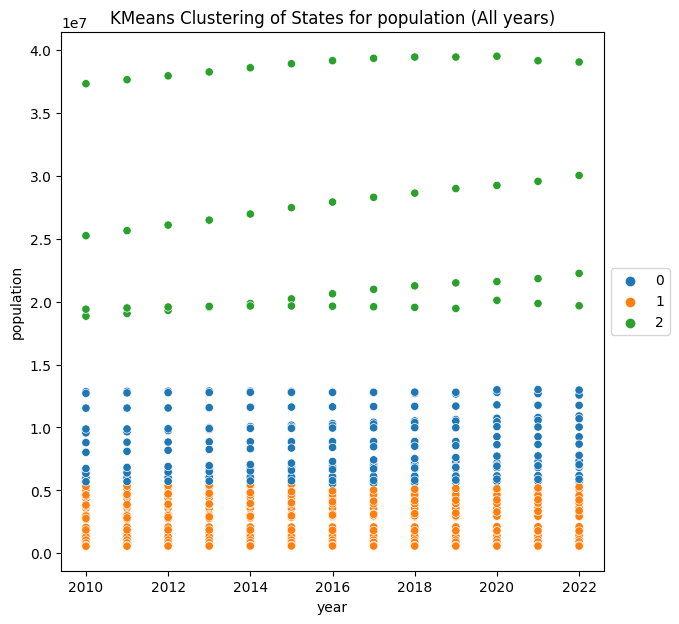

In [7]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df, x='year', y='population', hue='cluster', palette='tab10')
plt.title("KMeans Clustering of States for population (All years)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [8]:
# # Change the cluster labels
df['cluster'] = df['cluster'].replace({1: 'small_population', 0: 'medium_population', 2: 'large_population'})

In [9]:
NEWNAME = 'population_data_clustered.csv'
df.to_csv('../udataset/' + NEWNAME, index=False)